# Mobile Phone Price Prediction

#### About Dataset :

- In this Project,On the basis of the mobile Specification like Battery power, 3G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile. To know more about data https://www.kaggle.com/iabhishekofficial/mobile-price-classification

##### In this data:
- id:ID
- battery_power:Total energy a battery can store in one time measured in mAh
- blue:Has bluetooth or not
- clock_speed:speed at which microprocessor executes instructions
- dual_sim:Has dual sim support or not
- fc:Front Camera mega pixels
- four_g:Has 4G or not
- int_memory:Internal Memory in Gigabytes
- m_dep:Mobile Depth in cm
- mobile_wt:Weight of mobile phone
- n_cores:Number of cores of processor
- pc:Primary Camera mega pixels
- px_height:Pixel Resolution Height
- px_width:Pixel Resolution Width
- ram:Random Access Memory in Megabytes
- sc_h:Screen Height of mobile in cm
- sc_w:Screen Width of mobile in cm
- talk_time:longest time that a single battery charge will last when you are
- three_g:Has 3G or not
- touch_screen:Has touch screen or not
- wifi:Has wifi or not
- __price_range__: This is the target variable with value of __0 (low cost)__, __1 (medium cost)__, __2 (high cost)__ and __3 (very high cost)__

### 1. importing libraries & loading dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('train.csv')
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


- in this dataset there are 4 o/p varible.
- its multiclass classification problem.

- 0 - Low
- 1 - Medium
- 2 - High
- 3 - Very High

### 2. EDA

#### Checking the missing values.

In [3]:
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- There are no null values. So now We can check the datatype


#### 2.1 Checking the datatype

In [4]:
dataset.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

- Seems Like there are no Categorical Feature. All value are numeric dataset. So We can do further process.

In [5]:
dataset.shape

(2000, 21)

- We have 2000 samples and 21 Features.
- The last Feature is Target Feature which means we have label dataset.

#### 2.2 Descriptive Analysis

In [6]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### 2.3 Data Visulization & Analysis

####  2.3.1 checking balanced or imbalanced dataset

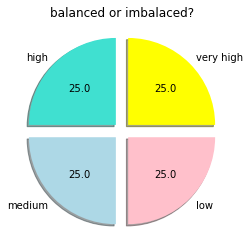

In [7]:
value_counts = pd.value_counts(dataset['price_range'])
value_counts.values # converting into numpy array cause other wise we can't plot pie
label  = ['very high', 'high', 'medium', 'low']
colors = ['yellow','turquoise','lightblue', 'pink']
fig1, axarr = plt.subplots()

plt.pie(value_counts.values, autopct = '%0.01f', explode = [0.1,0.1,0.1,0.1], shadow = True, labels = label, colors = colors)

axarr.set_title('balanced or imbalaced?')
plt.show()


- In above the pie chart all class have same number of dataset.
- 0 - 500 (low price)
- 1 - 500 (medium price)
- 2 - 500 (high price)
- 3 - 500 (very high price)

#### 2.3.2  Ram affect on price

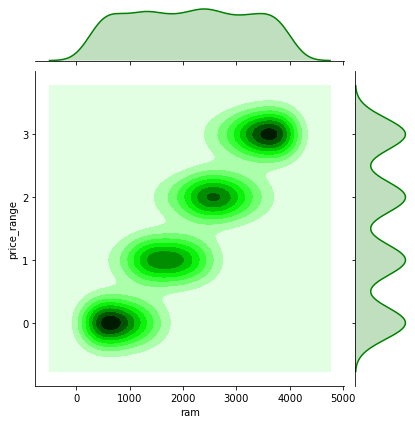

In [8]:
sns.jointplot(x = 'ram', y = 'price_range', data = dataset, kind = 'kde', color = 'green')

####  2.3.4 internal_memoery vs price

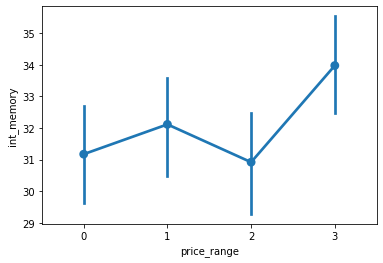

In [9]:
sns.pointplot(y = 'int_memory', x = 'price_range', data = dataset)

#### 2.3.5 Battery Power vs Price range

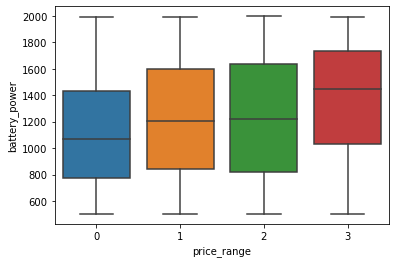

In [10]:
sns.boxplot(x = 'price_range', y = 'battery_power',data = dataset)

#### 2.3.6 4g supported or not

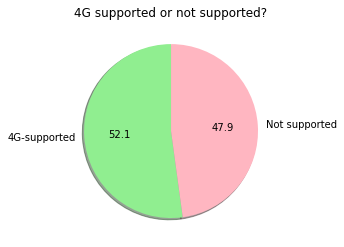

In [11]:
values = dataset['four_g'].value_counts()
label = ['4G-supported', 'Not supported']
color = ['lightgreen', 'lightpink']
fig, ax1 = plt.subplots()
plt.pie(values, autopct = '%0.01f', labels = label, startangle = 90, colors  =color, shadow = True)
ax1.set_title('4G supported or not supported?')
plt.show()

#### 2.3.7 3G support or not

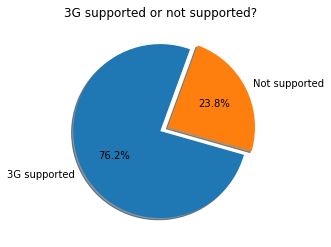

In [12]:
values = dataset['three_g'].value_counts()
label = ['3G supported', 'Not supported']
fig, ax1 = plt.subplots()
plt.pie(values, startangle = 70, labels = label, autopct = '%0.01f%%', explode = [0,0.1], shadow  = True)
ax1.set_title('3G supported or not supported?') 
plt.show()

#### 2.3.8 No. of Phones vs Camera megapixels of front and primary camera

Text(0.5, 0, 'MegaPixels')

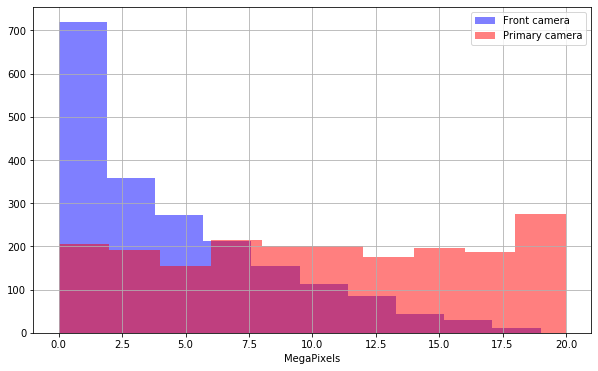

In [13]:
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')


####  2.3.9 Mobile Weight vs price

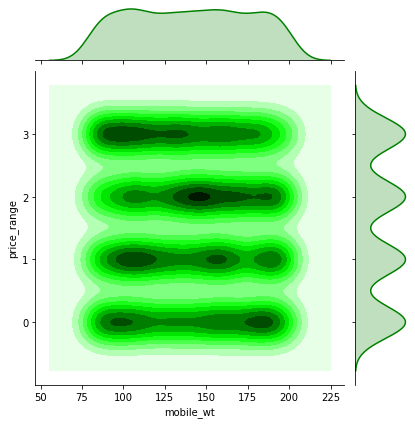

In [14]:
sns.jointplot(x = 'mobile_wt',y = 'price_range', data = dataset,kind = 'kde', color = 'green')
plt.show()

#### 2.3.10 time talk vs price_range

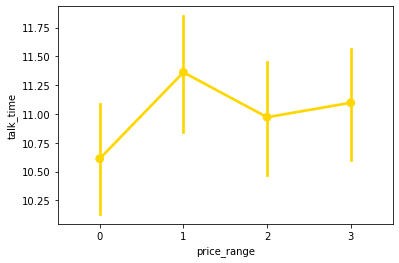

In [15]:
sns.pointplot(y = 'talk_time',x = 'price_range', data = dataset,kind = 'kde', color = 'gold')
plt.show()

#### 2.3.11 Finding the realation b/w the features

In [16]:
#sns.pairplot(data = dataset, hue = 'price_range')

#### 2.3.12 Finding the correlation b/w the features

In [17]:
dataset.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


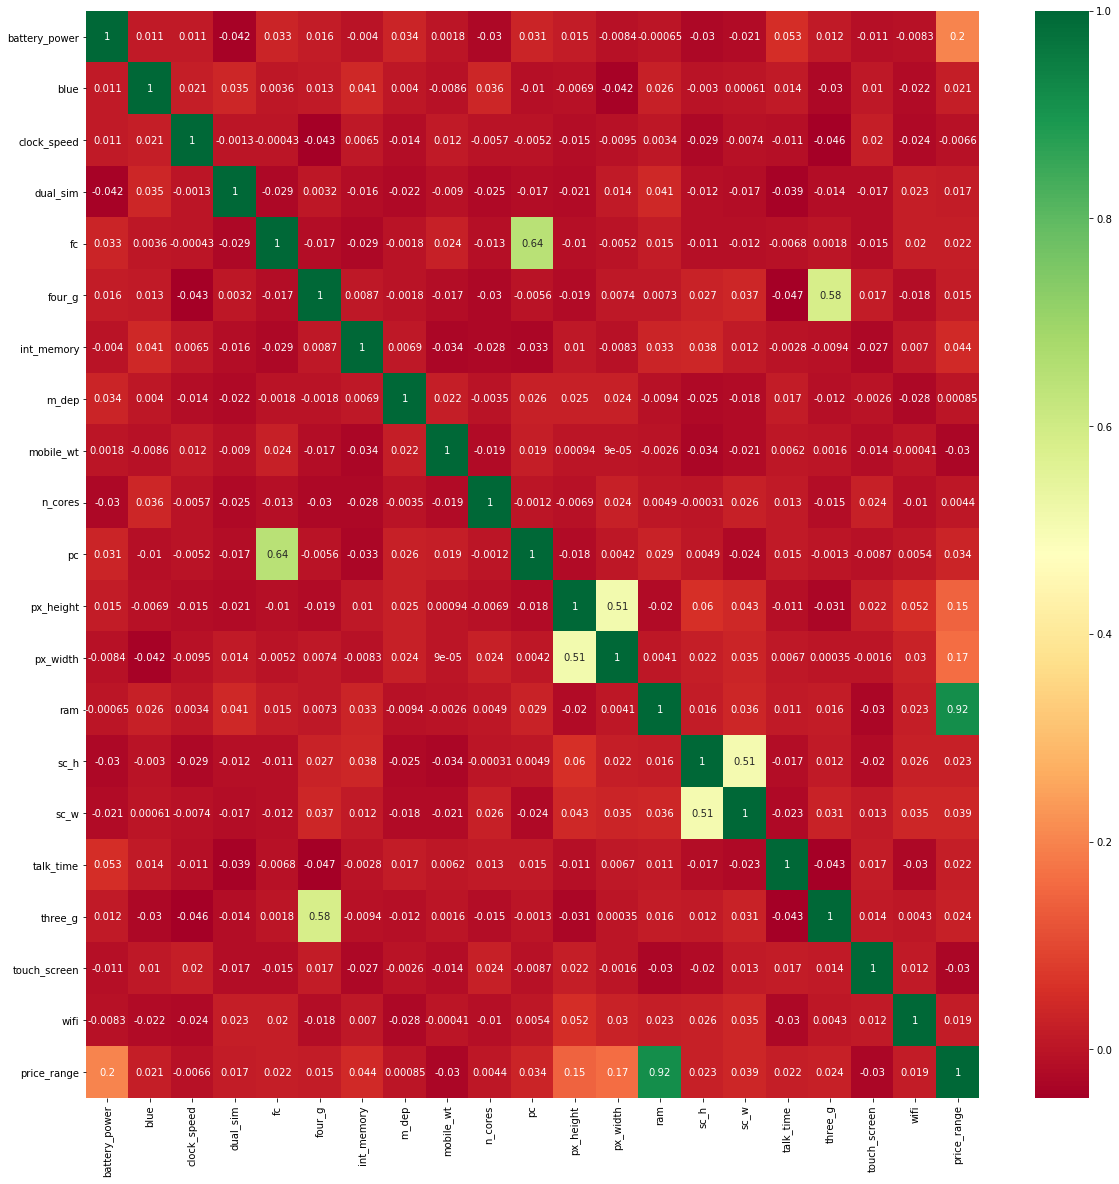

In [18]:
plt.figure(figsize = (20,20))
sns.heatmap(dataset.corr(), annot = True, cmap = 'RdYlGn')

## 3. Data preparing

#####  3.1 Dependent and indepedent dataset

In [19]:
X  = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [20]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [21]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

#### 3.2 Splitting data into train and test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state = 0)

#### 3.3 Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
X_train

array([[-1.60788581e-03, -9.65591606e-01,  1.67103471e+00, ...,
         5.64839529e-01, -9.86343245e-01, -1.02532046e+00],
       [ 1.37407489e+00, -9.65591606e-01, -1.27055019e+00, ...,
        -1.77041434e+00, -9.86343245e-01, -1.02532046e+00],
       [ 1.03920474e+00, -9.65591606e-01,  6.90506414e-01, ...,
         5.64839529e-01,  1.01384584e+00,  9.75304830e-01],
       ...,
       [-9.66386040e-02, -9.65591606e-01,  5.67940376e-01, ...,
        -1.77041434e+00, -9.86343245e-01,  9.75304830e-01],
       [-9.43759679e-02, -9.65591606e-01,  1.05820453e+00, ...,
         5.64839529e-01,  1.01384584e+00,  9.75304830e-01],
       [-1.19175450e+00, -9.65591606e-01, -1.27055019e+00, ...,
         5.64839529e-01, -9.86343245e-01,  9.75304830e-01]])

In [25]:
X_test

array([[ 0.50069734,  1.03563452, -1.27055019, ...,  0.56483953,
         1.01384584, -1.02532046],
       [-0.31837695,  1.03563452, -1.27055019, ..., -1.77041434,
         1.01384584, -1.02532046],
       [ 0.65908187,  1.03563452,  0.3228083 , ...,  0.56483953,
        -0.98634324,  0.97530483],
       ...,
       [-1.44516975,  1.03563452,  1.3033366 , ..., -1.77041434,
         1.01384584,  0.97530483],
       [ 0.99621466,  1.03563452,  0.07767623, ..., -1.77041434,
        -0.98634324, -1.02532046],
       [ 0.12962501, -0.96559161, -1.27055019, ..., -1.77041434,
         1.01384584,  0.97530483]])

## 4. Modeling

### 4.1 Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial',solver = 'sag') # (sag = Stochastic Average Gradient)
lr.fit(X_train, y_train)

# Predict the test set
y_pred = lr.predict(X_test)

# evauate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[ 93   2   0   0]
 [  2  85   5   0]
 [  0   3  91   5]
 [  0   0   1 113]]
0.955


In [27]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator = lr,X = X_train, y = y_train)
print('accuracy of validation set :', cvs.mean())
print('accuracy of the training set :', lr.score(X_train,y_train))
print('accuracy of the testset :', lr.score(X_test, y_test))

accuracy of validation set : 0.9612499999999999
accuracy of the training set : 0.978125
accuracy of the testset : 0.955


### 4.2 DecisonTreeClassifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train,y_train)

# Predict the test set
y_pred = dt.predict(X_test)

# evauate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[ 87   8   0   0]
 [  6  78   8   0]
 [  0  15  74  10]
 [  0   0   9 105]]
0.86


In [29]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator = dt,X = X_train, y = y_train)
print('accuracy of validation set :', cvs.mean())
print('accuracy of the training set :', dt.score(X_train,y_train))
print('accuracy of the testset :', dt.score(X_test, y_test))

accuracy of validation set : 0.8418749999999999
accuracy of the training set : 1.0
accuracy of the testset : 0.86


###  4.3 RandomForest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rf.fit(X_train, y_train)

# Predict the test set
y_pred = rf.predict(X_test)

# evauate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[ 93   2   0   0]
 [  7  74  11   0]
 [  0  16  74   9]
 [  0   0   7 107]]
0.87


In [31]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator = rf,X = X_train, y = y_train)
print('accuracy of validation set :', cvs.mean())
print('accuracy of the training set :', rf.score(X_train,y_train))
print('accuracy of the testset :', rf.score(X_test, y_test))

accuracy of validation set : 0.871875
accuracy of the training set : 1.0
accuracy of the testset : 0.87


### 4.4  Gaussian  Naive Bayes Classifier

In [32]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict the test set
y_pred = nb.predict(X_test)

# evauate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[ 89   6   0   0]
 [  4  69  19   0]
 [  0  16  70  13]
 [  0   0   8 106]]
0.835


In [33]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator = nb,X = X_train, y = y_train)
print('accuracy of validation set :', cvs.mean())
print('accuracy of the training set :', nb.score(X_train,y_train))
print('accuracy of the testset :', nb.score(X_test, y_test))

accuracy of validation set : 0.8012499999999999
accuracy of the training set : 0.81625
accuracy of the testset : 0.835


### 4.5 SVM

#####  using gridsearch find  the best parameter

In [34]:
parameters ={
'C' : [1,0.1,0.25,0.5,2,0.75],
'kernel' : ["linear","rbf"],
'gamma' : ["auto",0.01,0.001,0.0001,1],
'decision_function_shape' : ["ovo" ,"ovr"]}

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search = GridSearchCV(estimator = SVC(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           )
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 96.94 %
Best Parameters: {'C': 2, 'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


#### Applying SVM with best Parameters

In [36]:
from sklearn.svm import SVC

svc=SVC(C=2,gamma="auto",decision_function_shape="ovo",kernel="linear",random_state=0)
svc.fit(X_train, y_train)


# Predict the test set
y_pred = svc.predict(X_test)

# evaluate the preformance
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[ 94   1   0   0]
 [  2  86   4   0]
 [  0   7  87   5]
 [  0   0   1 113]]
0.95


In [37]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(estimator = svc,X = X_train, y = y_train)
print('accuracy of validation set :', cvs.mean())
print('accuracy of the training set :', svc.score(X_train,y_train))
print('accuracy of the testset :', svc.score(X_test, y_test))

accuracy of validation set : 0.961875
accuracy of the training set : 0.980625
accuracy of the testset : 0.95


## 5. Conclusion:

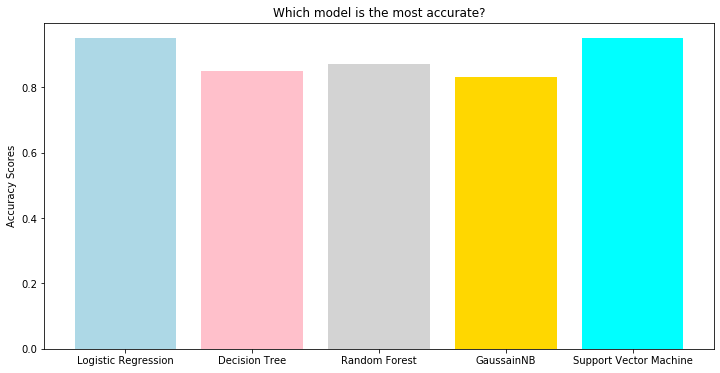

In [38]:
plt.figure(figsize = (12,6))
label = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'GaussainNB', 'Support Vector Machine',]
acc_score = [0.95, 0.85, 0.87, 0.83, 0.95]

plt.bar(label,acc_score, color=['lightblue', 'pink', 'lightgrey','gold', 'cyan'])
plt.title('Which model is the most accurate?')
plt.xlabel('')
plt.ylabel('Accuracy Scores')
plt.show()

- After training our dataset with five different model, we conclude that __SVM__ & __Logistic Regression__ is best model for our dataset. (via the highest accuracy score = 0.95)
- But here i'm selecting __SVM__ to predict the test dataset. but we can also use Logsitic Regression.

## 6. Applying the SVM to Test dataset

#### 6.1 Loading test data

In [39]:
test_data = pd.read_csv('test.csv')
test_data.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


- Note : We don't have id column in 'train.csv' data so can  drop this columns from our test_dataset.To make the dimension of input dataset same.

#### 6.2 dropping the 'id' Column

In [40]:
test_df  = test_data.drop('id', axis = 1)

In [41]:
test_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


- Successfully removed id column from test_data.

##### 6.3 Applying Feature scaling to test set

In [42]:

sc = StandardScaler()
test_df1 = sc.fit_transform(test_df)


#### 6.4 Applying SVM to test_df

In [43]:
predicted_price_range = svc.predict(test_df1) 

In [44]:
predicted_price_range

array([2, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 1, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 1, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 1, 1, 2, 3,
       3, 2, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 1, 2, 2, 3, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 2, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 0, 2, 3, 1, 1, 3, 2, 1, 3, 0, 0, 3, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

- here above,we have predicted price by SVM Model for this __test_df__ dataset. Now we are going to add __predicted_price_range__ to the __test_df__ dataset.

#### 6.5 Adding the predicted price to test_df

In [45]:
test_df['price_range'] = predicted_price_range

In [46]:
test_df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,2
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2


- __We have achieved our goal and predicted price ranges for mobile phones in our new dataset__.